In [1]:
import pandas as pd
import matplotlib as mpl
import scipy 
import numpy as np
%matplotlib inline
import os
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
fimbriae_data = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/comparative-genomics-huti/data/fimbria.csv"
OCG_data="/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/data/processed_counts/2018-01-29_combined_counts.csv"

In [2]:

ocg = pd.read_csv(OCG_data, index_col = 0)
ocg = ocg.dropna(subset=["CFT073"])
ocg.set_index("CFT073", inplace=True)
to_drop=[c for c in list(ocg.columns) if 'counts' in c or 'MG1655' in c or 'Unnamed' in c or 'seq' in c]
ocg = ocg.drop(to_drop, axis = 1)



//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,8,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fimb = pd.read_csv(fimbriae_data, index_col='genome_locus_tag')
fim_ocg = fimb.merge(ocg, how='inner', left_index=True, right_index=True)
fim_ocg.shape

(34, 46)

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


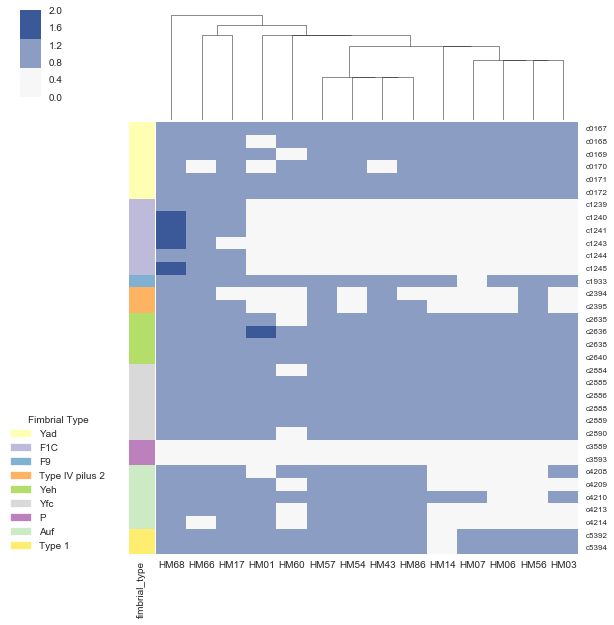

In [25]:
# Presence/Absence
to_drop_for_pa = [c for c in list(fim_ocg.columns) if 'RPKM' in c] + ['gene_symbol', 'function', 'genome', 'gene_symbol']
fim_pa = fim_ocg.drop(to_drop_for_pa, axis = 1)
fim_type = fim_pa.pop("fimbrial_type")
fim_pa.fillna(0, inplace=True)
fim_pa.replace("PARALOGS", 2, inplace=True)
fim_pa.replace("PROKKA.*", 1, inplace=True, regex=True)

strain_cluster = scipy.cluster.hierarchy.linkage(fim_pa.T)

num_colors = len(fim_type.unique())
colors = [mpl.cm.Set3(1.*i/9) for i in range(1, num_colors +1)]
lut = dict(zip(fim_type.unique(), colors))
row_colors = fim_type.map(lut)
cmap = mpl.colors.ListedColormap(["#f7f7f7", "#8b9dc3","#3b5998"])

g = sns.clustermap(fim_pa, row_cluster=False, col_linkage=strain_cluster, row_colors=row_colors,cmap=cmap);
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 8);
legend = [mpl.patches.Patch(color=c, label=l) for l,c in lut.items()]
l2=g.ax_heatmap.legend(handles=legend, bbox_to_anchor=(-0.1,0.34))
#l2=g.ax_heatmap.legend(loc='lower left',handles=legend,frameon=True)
l2.set_title(title='Fimbrial Type',prop={'size':10})
g

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


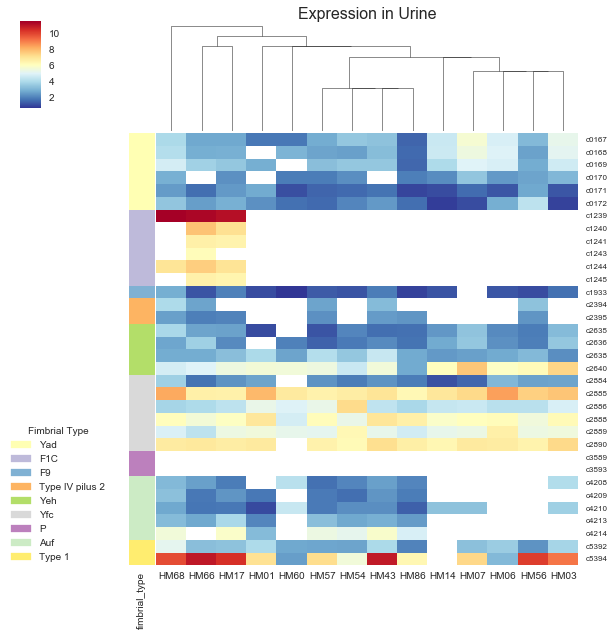

In [38]:
# Expression in urine
cmap = mpl.cm.RdYlBu_r
cmap.set_bad(color='white')

#to_drop_for_expr = [c for c in list(fim_ocg.columns) if not'RPKM' in c and not 'fimbrial_type' in c and not 'UR' in c] 
to_keep = [c for c in list(fim_ocg.columns) if "RPKM" and "UR" in c]
ur_fim_expr = fim_ocg[to_keep]

fim_type = fim_ocg["fimbrial_type"]
ur_fim_expr.columns = [c.split("_")[0] for c in list(ur_fim_expr.columns)]

ur_fim_expr = ur_fim_expr[list(fim_pa.columns)]
ur_fim_expr_log = np.log2(ur_fim_expr+1)
g = sns.clustermap(ur_fim_expr_log, row_cluster=False,  col_linkage = strain_cluster, cmap = cmap, row_colors=row_colors);
g.ax_heatmap.set_title("Expression in Urine", y = 1.25, fontsize = 16)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 8);
legend = [mpl.patches.Patch(color=c, label=l) for l,c in lut.items()]
l2=g.ax_heatmap.legend(handles=legend, bbox_to_anchor=(-0.1,0.34))
#l2=g.ax_heatmap.legend(loc='lower left',handles=legend,frameon=True)
l2.set_title(title='Fimbrial Type',prop={'size':10})
g





//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


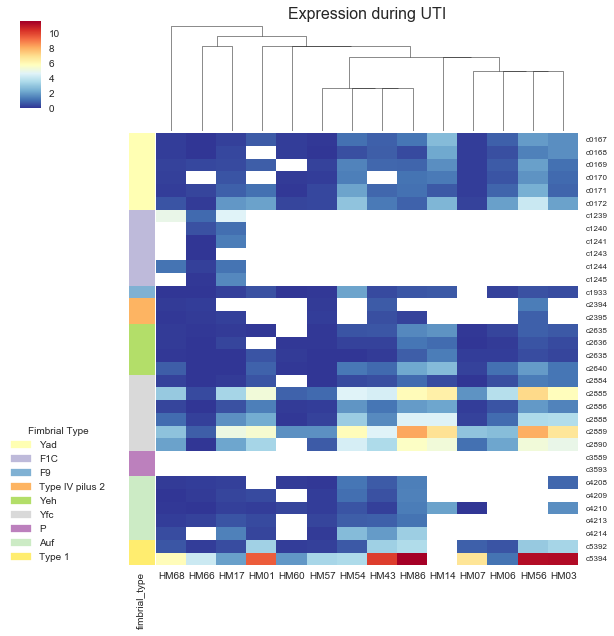

In [39]:
# Expression in UTI

to_keep = [c for c in list(fim_ocg.columns) if "RPKM" and "UTI" in c]
uti_fim_expr = fim_ocg[to_keep]


uti_fim_expr.columns = [c.split("_")[0] for c in list(uti_fim_expr.columns)]
uti_fim_expr = uti_fim_expr[list(fim_pa.columns)]
uti_fim_expr_log = np.log2(uti_fim_expr+1)
g = sns.clustermap(uti_fim_expr_log, row_cluster=False,  col_linkage = strain_cluster, cmap = cmap, row_colors=row_colors);
g.ax_heatmap.set_title("Expression during UTI", y = 1.25, fontsize = 16)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0, fontsize = 8);
legend = [mpl.patches.Patch(color=c, label=l) for l,c in lut.items()]
l2=g.ax_heatmap.legend(handles=legend, bbox_to_anchor=(-0.1,0.34))
#l2=g.ax_heatmap.legend(loc='lower left',handles=legend,frameon=True)
l2.set_title(title='Fimbrial Type',prop={'size':10})
g

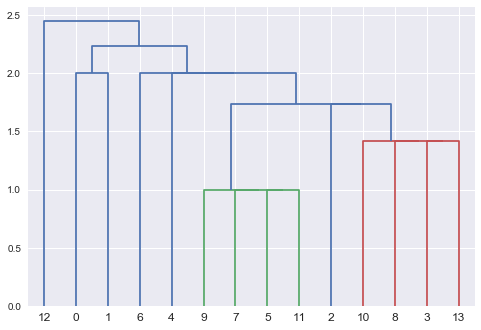

In [10]:
fim_pa
z = scipy.cluster.hierarchy.linkage(fim_pa.T)
scipy.cluster.hierarchy.dendrogram(z)
plt.show()

//anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


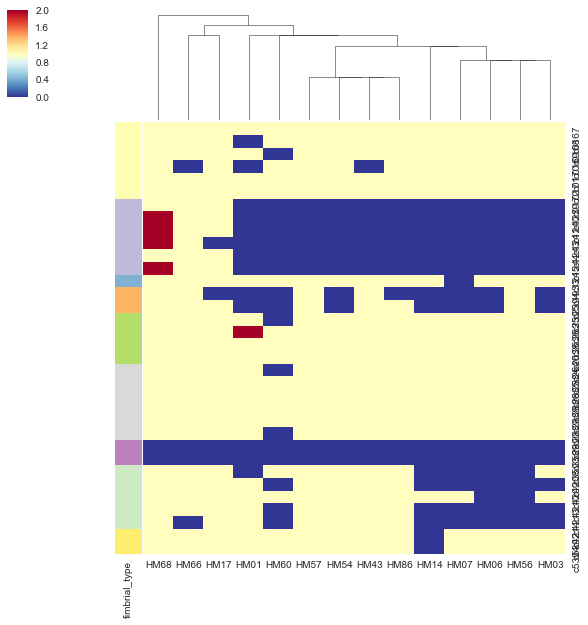

In [62]:
g = sns.clustermap(fim_pa,  row_cluster=False, col_linkage=z, row_colors=row_colors,cmap=cmap);

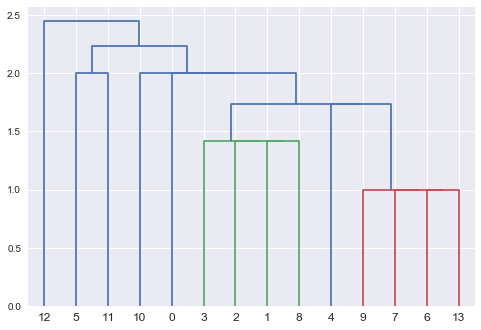

In [16]:
x = fim_pa.T.sort_index()
x
z = scipy.cluster.hierarchy.linkage(x)
scipy.cluster.hierarchy.dendrogram(z)
plt.show()

In [21]:
fim_pa.columns

Index(['HM66', 'HM17', 'HM14', 'HM56', 'HM60', 'HM43', 'HM01', 'HM54', 'HM06',
       'HM57', 'HM07', 'HM86', 'HM68', 'HM03'],
      dtype='object')

In [24]:
ur_fim_expr = ur_fim_expr[list(fim_pa.columns)]
ur_fim_expr.head()

,HM66,HM17,HM14,HM56,HM60,HM43,HM01,HM54,HM06,HM57,HM07,HM86,HM68,HM03
c0167,5.76,5.85,22.19,7.85,2.53,9.23,2.51,10.17,27.01,6.10,51.49,1.79,14.51,36.69
c0168,6.32,6.57,22.88,5.20,7.07,8.34,NaN,4.95,30.29,5.47,42.48,1.97,16.30,34.15
c0169,12.34,10.09,14.67,6.26,NaN,10.09,6.30,10.27,27.62,8.53,30.76,1.88,26.04,24.61
c0170,NaN,3.89,3.68,5.46,2.81,NaN,NaN,3.75,4.58,2.81,9.71,2.88,6.51,7.64
c0171,2.12,4.44,1.11,5.76,1.14,2.33,5.93,2.00,1.39,1.82,2.09,0.90,4.69,1.39
